# Clusters
Este modulo contiene un conjunto de distintos ejemplos de clusterizaciones, nos sirve para mostrar el potencial de nbdev y como generar software de forma consistente. 

In [1]:
#| default_exp Cluster_ejemplo

In [2]:
#| hide
#| export
from nbdev.showdoc import *
import sklearn
import random 
import numpy as np
import shapely


# Clase para generar puntos geométricos. 
Vamos hacer una clase para que contenga puntos y que sean ya geometrías. 

In [3]:
#| export
class data_points:
    """Una clase que contiene a los datos"""
    def __init__(self, n, min_x = 0, min_y = 0, max_x= 1, max_y=1, seed= None):
        if seed != None:
            random.seed(seed)
        
        self.Points = np.random.uniform(low= min_x, high= max_x, size=(n, 2));
        self.Points =  [shapely.Point(x[0],x[1]) for x in self.Points]

    
    def get_points(self):
        """Una funcion que para obtener los puntos"""
        return self.Points

    def get_Multypoint(self):
        """Regresa un objeto MultiPoint con los puntos"""
        return shapely.geometry.MultiPoint(self.Points)
    
    def get_X(self):
        """Regresa las coordenadas X"""
        return [x.x for x in self.Points]

    def get_Y(self):
        """Regresa las coordenadas X"""
        return [x.x for x in self.Points]

            
    

In [4]:
#| hide
datos_simples = data_points(40)


In [10]:
#| hide
datos_simples.get_points()

[<POINT (0.297 0.693)>,
 <POINT (0.97 0.735)>,
 <POINT (0.768 0.513)>,
 <POINT (0.264 0.405)>,
 <POINT (0.679 0.997)>,
 <POINT (0.456 0.475)>,
 <POINT (0.938 0.058)>,
 <POINT (0.992 0.986)>,
 <POINT (0.879 0.188)>,
 <POINT (0.046 0.696)>,
 <POINT (0.255 0.532)>,
 <POINT (0.269 0.196)>,
 <POINT (0.467 0.46)>,
 <POINT (0.927 0.559)>,
 <POINT (0.877 0.681)>,
 <POINT (0.914 0.883)>,
 <POINT (0.224 0.273)>,
 <POINT (0.545 0.481)>,
 <POINT (0.215 0.975)>,
 <POINT (0.437 0.579)>,
 <POINT (0.848 0.444)>,
 <POINT (0.423 0.735)>,
 <POINT (0.115 0.525)>,
 <POINT (0.654 0.286)>,
 <POINT (0.226 0.564)>,
 <POINT (0.967 0.174)>,
 <POINT (0.429 0.088)>,
 <POINT (0.968 0.51)>,
 <POINT (0.489 0.255)>,
 <POINT (0.165 0.268)>,
 <POINT (0.934 0.898)>,
 <POINT (0.101 0.166)>,
 <POINT (0.722 0.135)>,
 <POINT (0.287 0.843)>,
 <POINT (0.042 0.609)>,
 <POINT (0.809 0.712)>,
 <POINT (0.875 0.992)>,
 <POINT (0.651 0.104)>,
 <POINT (0.25 0.579)>,
 <POINT (0.961 0.64)>]

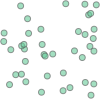

In [6]:
#| hide
datos_simples.get_Multypoint()

In [7]:
#| hide
datos_simples.get_X()

[0.2969721818345471,
 0.9695993636424152,
 0.7682054628099028,
 0.2638508503924647,
 0.6786841172809145,
 0.4557799907410014,
 0.9379588025188824,
 0.9922849564614676,
 0.87934375556521,
 0.04566606742669965,
 0.25462446588152576,
 0.26864210666231514,
 0.4670302752589506,
 0.9266289257967224,
 0.8767875574622442,
 0.9136488855597851,
 0.22387892894954775,
 0.5450659897966604,
 0.2153479585719137,
 0.436516518074039,
 0.8484766829983107,
 0.42346260198755714,
 0.1145819907763741,
 0.6538451927866481,
 0.22603212984465548,
 0.9668468456802795,
 0.4293684899185152,
 0.9679610311364597,
 0.4891101523629048,
 0.16490049255469996,
 0.9344962249131796,
 0.10128587152183244,
 0.7219134980815002,
 0.2865186910462011,
 0.04154814798497186,
 0.8091597811211938,
 0.8750832838081907,
 0.6511903564672106,
 0.24961674397935307,
 0.9608670011435055]

In [8]:
#| hide
#| output: false
datos_simples.get_Y()

[0.2969721818345471,
 0.9695993636424152,
 0.7682054628099028,
 0.2638508503924647,
 0.6786841172809145,
 0.4557799907410014,
 0.9379588025188824,
 0.9922849564614676,
 0.87934375556521,
 0.04566606742669965,
 0.25462446588152576,
 0.26864210666231514,
 0.4670302752589506,
 0.9266289257967224,
 0.8767875574622442,
 0.9136488855597851,
 0.22387892894954775,
 0.5450659897966604,
 0.2153479585719137,
 0.436516518074039,
 0.8484766829983107,
 0.42346260198755714,
 0.1145819907763741,
 0.6538451927866481,
 0.22603212984465548,
 0.9668468456802795,
 0.4293684899185152,
 0.9679610311364597,
 0.4891101523629048,
 0.16490049255469996,
 0.9344962249131796,
 0.10128587152183244,
 0.7219134980815002,
 0.2865186910462011,
 0.04154814798497186,
 0.8091597811211938,
 0.8750832838081907,
 0.6511903564672106,
 0.24961674397935307,
 0.9608670011435055]

In [14]:
#| eval: false
raise Exception("Si hay problema la evaluacion ")

Exception: Si hay problema la evaluacion 

In [9]:
#| hide
import nbdev; nbdev.nbdev_export()